## Importing Necessary Libraries

In [1]:
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## Data Loading & Preprocessing

In [2]:
df = pd.read_excel('houses.xlsx')
df

,House No.,Price,Location,Beds,Baths,Area
0,1,45 Crore,"F-7/1, F-7",8.0,8.0,1.3 Kanal
1,2,85 Crore,"F-7/4, F-7",NaN,NaN,4 Kanal
2,3,38 Crore,"F-7, Islamabad",6.0,7.0,1.3 Kanal
3,4,32 Crore,"F-7, Islamabad",6.0,7.0,1.1 Kanal
4,5,36 Crore,"F-7, Islamabad",6.0,6.0,1.2 Kanal
...,...,...,...,...,...,...
345,346,35 Crore,"F-7/3, F-7",5.0,5.0,1.8 Kanal
346,347,38 Crore,"F-7/1, F-7",NaN,NaN,1.3 Kanal
347,348,60 Crore,"F-7, Islamabad",7.0,6.0,2 Kanal
348,349,30 Crore,"F-7/2, F-7",8.0,8.0,1.3 Kanal


In [3]:
df = df.drop(['House No.', 'Location'], axis=1)
df

,Price,Beds,Baths,Area
0,45 Crore,8.0,8.0,1.3 Kanal
1,85 Crore,NaN,NaN,4 Kanal
2,38 Crore,6.0,7.0,1.3 Kanal
3,32 Crore,6.0,7.0,1.1 Kanal
4,36 Crore,6.0,6.0,1.2 Kanal
...,...,...,...,...
345,35 Crore,5.0,5.0,1.8 Kanal
346,38 Crore,NaN,NaN,1.3 Kanal
347,60 Crore,7.0,6.0,2 Kanal
348,30 Crore,8.0,8.0,1.3 Kanal


In [4]:
print(len(df))
df.isnull().any()

350


Price    False
Beds      True
Baths     True
Area     False
dtype: bool

In [5]:
df = df.dropna()
print(len(df))
df

286


,Price,Beds,Baths,Area
0,45 Crore,8.0,8.0,1.3 Kanal
2,38 Crore,6.0,7.0,1.3 Kanal
3,32 Crore,6.0,7.0,1.1 Kanal
4,36 Crore,6.0,6.0,1.2 Kanal
5,48 Crore,5.0,6.0,1.2 Kanal
...,...,...,...,...
343,28 Crore,6.0,5.0,1.2 Kanal
345,35 Crore,5.0,5.0,1.8 Kanal
347,60 Crore,7.0,6.0,2 Kanal
348,30 Crore,8.0,8.0,1.3 Kanal


In [6]:
df[['Price', 'Price_Unit']] = df['Price'].str.split(' ', expand=True)
df

C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_7924\650962604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Price', 'Price_Unit']] = df['Price'].str.split(' ', expand=True)
C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_7924\650962604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Price', 'Price_Unit']] = df['Price'].str.split(' ', expand=True)


,Price,Beds,Baths,Area,Price_Unit
0,45,8.0,8.0,1.3 Kanal,Crore
2,38,6.0,7.0,1.3 Kanal,Crore
3,32,6.0,7.0,1.1 Kanal,Crore
4,36,6.0,6.0,1.2 Kanal,Crore
5,48,5.0,6.0,1.2 Kanal,Crore
...,...,...,...,...,...
343,28,6.0,5.0,1.2 Kanal,Crore
345,35,5.0,5.0,1.8 Kanal,Crore
347,60,7.0,6.0,2 Kanal,Crore
348,30,8.0,8.0,1.3 Kanal,Crore


In [7]:
df["Price_Unit"].unique()

array(['Crore', 'Arab'], dtype=object)

In [8]:
df['Price_Unit'].value_counts()

Crore    283
Arab       3
Name: Price_Unit, dtype: int64

In [9]:
df['Price'] = df['Price'].astype(float)
df.loc[df['Price_Unit'] == 'Arab', 'Price'] = df[df['Price_Unit'] == 'Arab']['Price'] * 100
df.loc[df['Price_Unit'] == 'Arab']

C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_7924\192927940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].astype(float)


,Price,Beds,Baths,Area,Price_Unit
217,180.0,10.0,10.0,4 Kanal,Arab
257,162.0,11.0,10.0,4 Kanal,Arab
276,162.0,11.0,10.0,4 Kanal,Arab


In [10]:
df[['Area', 'Area_Unit']] = df['Area'].str.split(' ', expand=True)
df['Area'] = df['Area'].astype(float)
# df.loc[df['Area_Unit'] == 'Kanal', 'Area'] = df[df['Area_Unit'] == 'Kanal']['Area'] * 20
df

C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_7924\3443837752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Area', 'Area_Unit']] = df['Area'].str.split(' ', expand=True)
C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_7924\3443837752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Area', 'Area_Unit']] = df['Area'].str.split(' ', expand=True)
C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_7924\3443837752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a cop

,Price,Beds,Baths,Area,Price_Unit,Area_Unit
0,45.0,8.0,8.0,1.3,Crore,Kanal
2,38.0,6.0,7.0,1.3,Crore,Kanal
3,32.0,6.0,7.0,1.1,Crore,Kanal
4,36.0,6.0,6.0,1.2,Crore,Kanal
5,48.0,5.0,6.0,1.2,Crore,Kanal
...,...,...,...,...,...,...
343,28.0,6.0,5.0,1.2,Crore,Kanal
345,35.0,5.0,5.0,1.8,Crore,Kanal
347,60.0,7.0,6.0,2.0,Crore,Kanal
348,30.0,8.0,8.0,1.3,Crore,Kanal


In [11]:
df = df.drop(['Price_Unit', 'Area_Unit'], axis=1)
df

,Price,Beds,Baths,Area
0,45.0,8.0,8.0,1.3
2,38.0,6.0,7.0,1.3
3,32.0,6.0,7.0,1.1
4,36.0,6.0,6.0,1.2
5,48.0,5.0,6.0,1.2
...,...,...,...,...
343,28.0,6.0,5.0,1.2
345,35.0,5.0,5.0,1.8
347,60.0,7.0,6.0,2.0
348,30.0,8.0,8.0,1.3


In [12]:
df.isnull().any()

Price    False
Beds     False
Baths    False
Area     False
dtype: bool

## Multivariate Regression Without Scaling

Learning Rate: 0.0001 	--->	  R-Squared Score: 0.6065989441477064 
Learning Rate: 0.001 	--->	  R-Squared Score: 0.6131182973564517 
Learning Rate: 0.01 	--->	  R-Squared Score: 0.5974906804894354 
Learning Rate: 0.1 	--->	  R-Squared Score: 0.67811101083814 
Learning Rate: 0.5 	--->	  R-Squared Score: -1.7257409004999134e+21 


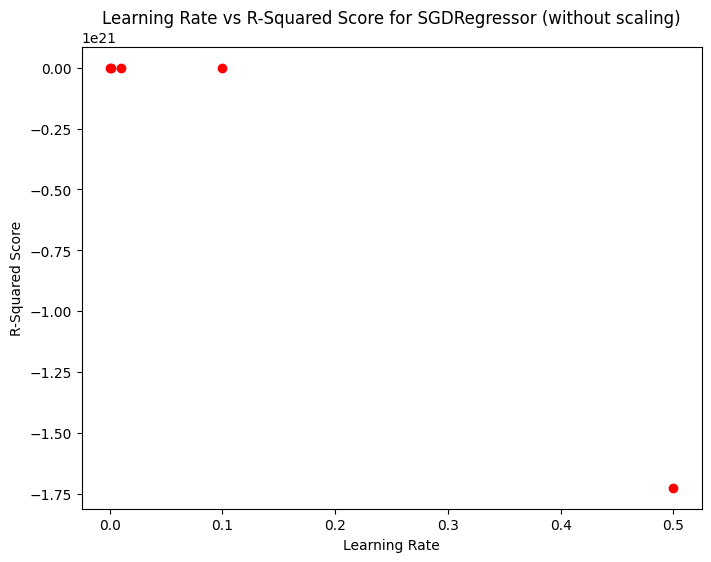

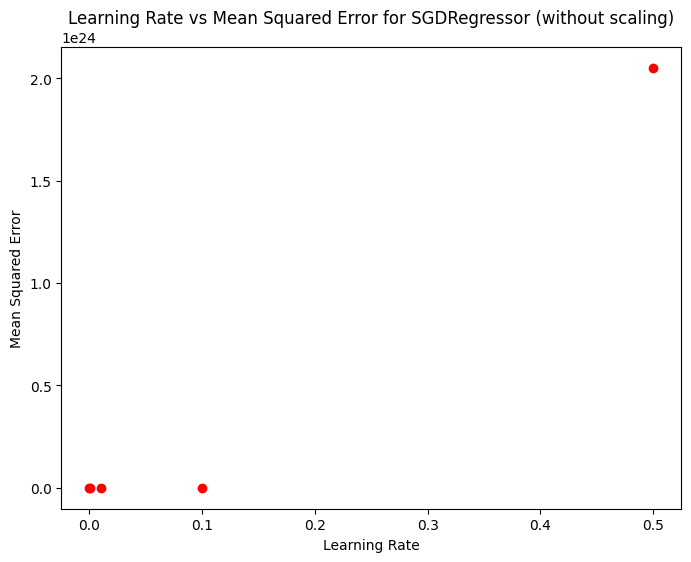

Learning Rate: 0.0001 	--->	  Mean Squared Error: 467.80520833796936
Learning Rate: 0.001 	--->	  Mean Squared Error: 460.0528463636514
Learning Rate: 0.01 	--->	  Mean Squared Error: 478.6361227823231
Learning Rate: 0.1 	--->	  Mean Squared Error: 382.76802615674626
Learning Rate: 0.5 	--->	  Mean Squared Error: 2.0521312016987313e+24


In [13]:
# selecting data
X = df[['Beds', 'Baths', 'Area']]
y = df['Price']

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5]

# setting up plot
fig, ax = plt.subplots(figsize=(8,6))
fig2, ax2 = plt.subplots(figsize=(8,6))

mses = []

# training and testing model for each learning rate
for lr in learning_rates:
    model = SGDRegressor(max_iter=100000, eta0=lr, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)    
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)
    r2 = r2_score(y_test, y_pred)
    
    print("Learning Rate: {} \t--->\t  R-Squared Score: {} ".format(lr, r2))
    
    ax.plot(lr, r2, 'ro')
    ax2.plot(lr, mse, 'ro')
    
ax.set_xlabel('Learning Rate')
ax.set_ylabel('R-Squared Score')
ax.set_title('Learning Rate vs R-Squared Score for SGDRegressor (without scaling)')

ax2.set_xlabel('Learning Rate')
ax2.set_ylabel('Mean Squared Error')
ax2.set_title('Learning Rate vs Mean Squared Error for SGDRegressor (without scaling)')

# plotting graph
plt.show()

for i in range(5):
    print("Learning Rate: {} \t--->\t  Mean Squared Error: {}".format(learning_rates[i], mses[i]))

## Multivariate Regression With Scaling

Learning Rate: 0.0001 	--->	  R-Squared Score: 0.6330386750400825 
Learning Rate: 0.001 	--->	  R-Squared Score: 0.6524324276013911 
Learning Rate: 0.01 	--->	  R-Squared Score: 0.6580419696059836 
Learning Rate: 0.1 	--->	  R-Squared Score: 0.6897373192715666 
Learning Rate: 0.5 	--->	  R-Squared Score: 0.751217502159921 


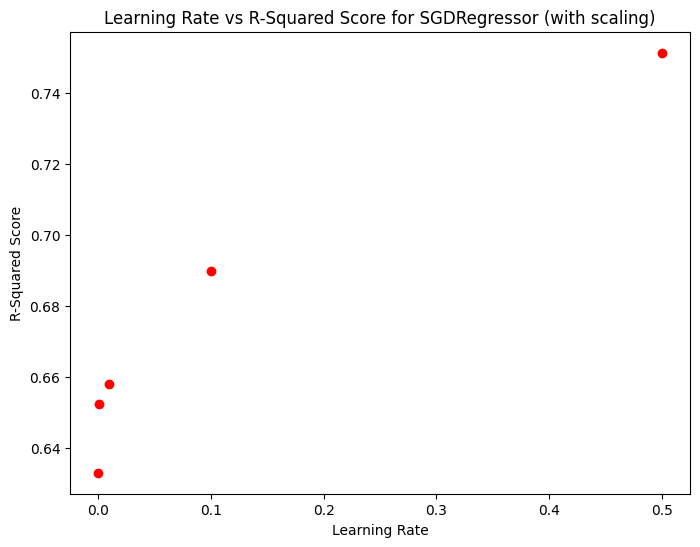

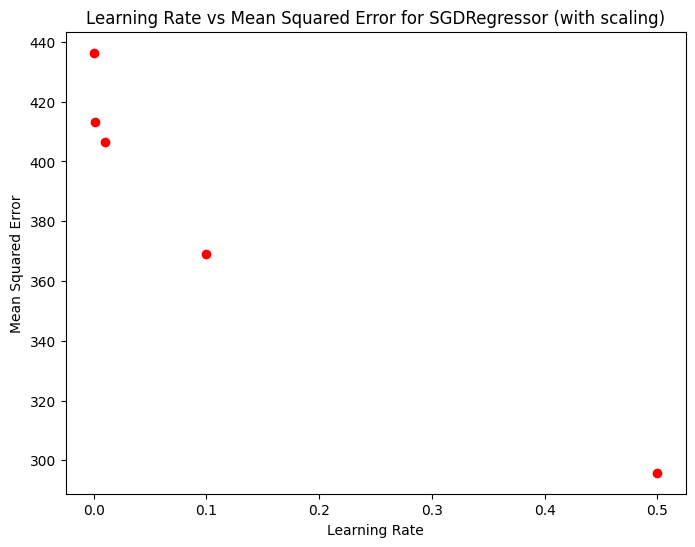

Learning Rate: 0.0001 	--->	  Mean Squared Error: 436.3649169749696
Learning Rate: 0.001 	--->	  Mean Squared Error: 413.30321360017155
Learning Rate: 0.01 	--->	  Mean Squared Error: 406.63273591054315
Learning Rate: 0.1 	--->	  Mean Squared Error: 368.9428277796919
Learning Rate: 0.5 	--->	  Mean Squared Error: 295.8348649593235


In [14]:
# selecting data
X = df[['Beds', 'Baths', 'Area']]
y = df['Price']

# scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5]

# setting up plot
fig, ax = plt.subplots(figsize=(8,6))
fig2, ax2 = plt.subplots(figsize=(8,6))

mses = []

# training and testing model for each learning rate
for lr in learning_rates:
    model = SGDRegressor(max_iter=100000, eta0=lr, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)    
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)
    r2 = r2_score(y_test, y_pred)
    
    print("Learning Rate: {} \t--->\t  R-Squared Score: {} ".format(lr, r2))
    
    ax.plot(lr, r2, 'ro')
    ax2.plot(lr, mse, 'ro')
    
ax.set_xlabel('Learning Rate')
ax.set_ylabel('R-Squared Score')
ax.set_title('Learning Rate vs R-Squared Score for SGDRegressor (with scaling)')

ax2.set_xlabel('Learning Rate')
ax2.set_ylabel('Mean Squared Error')
ax2.set_title('Learning Rate vs Mean Squared Error for SGDRegressor (with scaling)')

# plotting graph
plt.show()

for i in range(5):
    print("Learning Rate: {} \t--->\t  Mean Squared Error: {}".format(learning_rates[i], mses[i]))

## Polynomial Regression Without Scaling

Degree: 1 	--->	  R-Squared Score: 0.5971461383110387 
Degree: 2 	--->	  R-Squared Score: -7.683874063604497e+21 
Degree: 3 	--->	  R-Squared Score: -2.7521658436429445e+25 
Degree: 4 	--->	  R-Squared Score: -1.6936517103011005e+30 


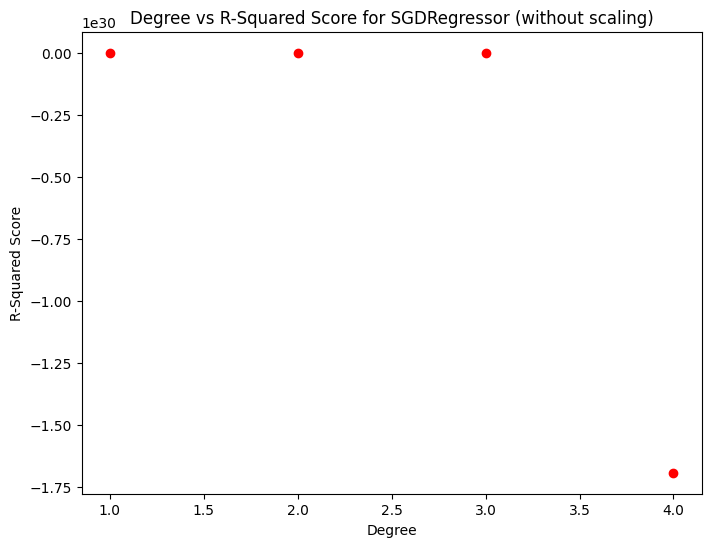

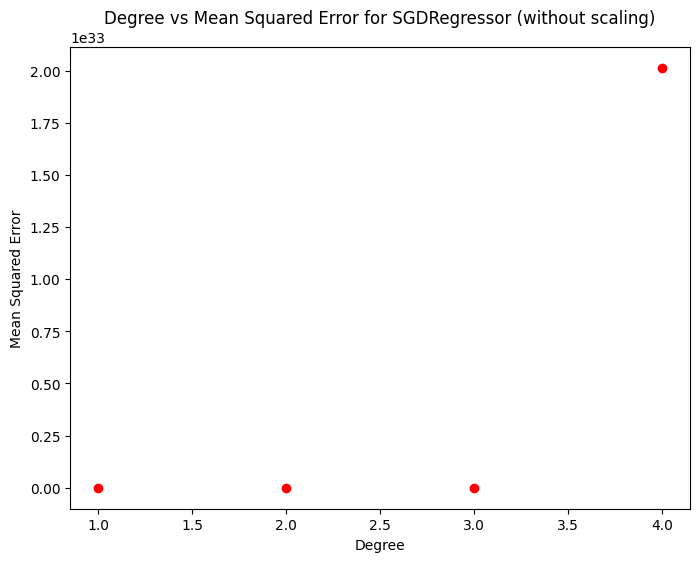

Degree: 1 	--->	  Mean Squared Error: 479.0458284075328
Degree: 2 	--->	  Mean Squared Error: 9.137129282430889e+24
Degree: 3 	--->	  Mean Squared Error: 3.272684444317881e+28
Degree: 4 	--->	  Mean Squared Error: 2.0139729657635724e+33


In [15]:
# selecting data
X = df[['Beds', 'Baths', 'Area']]
y = df['Price']

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [1, 2, 3, 4]

# set up plot
fig, ax = plt.subplots(figsize=(8,6))
fig2, ax2 = plt.subplots(figsize=(8,6))

mses = []

# training and testing model for each degree
for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = SGDRegressor(max_iter=100000, random_state=42)
    model.fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)
    r2 = r2_score(y_test, y_pred)
    
    print("Degree: {} \t--->\t  R-Squared Score: {} ".format(degree, r2))
    
    ax.plot(degree, r2, 'ro')
    ax2.plot(degree, mse, 'ro')
    
ax.set_xlabel('Degree')
ax.set_ylabel('R-Squared Score')
ax.set_title('Degree vs R-Squared Score for SGDRegressor (without scaling)')

ax2.set_xlabel('Degree')
ax2.set_ylabel('Mean Squared Error')
ax2.set_title('Degree vs Mean Squared Error for SGDRegressor (without scaling)')


# plotting graph
plt.show()

for i in range(4):
    print("Degree: {} \t--->\t  Mean Squared Error: {}".format(i+1, mses[i]))


## Polynomial Regression With Scaling

Degree: 1 	--->	  R-Squared Score: 0.6579324951420813 
Degree: 2 	--->	  R-Squared Score: 0.5680675033293179 
Degree: 3 	--->	  R-Squared Score: -9541333515424620.0 
Degree: 4 	--->	  R-Squared Score: -3.68078908636878e+21 


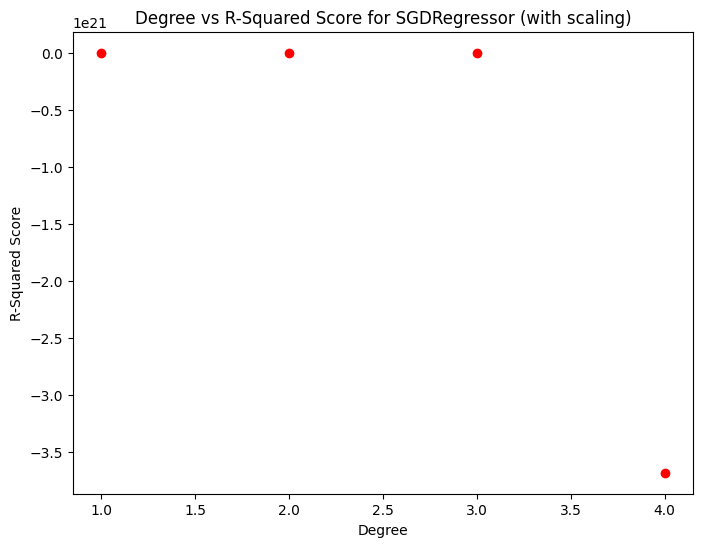

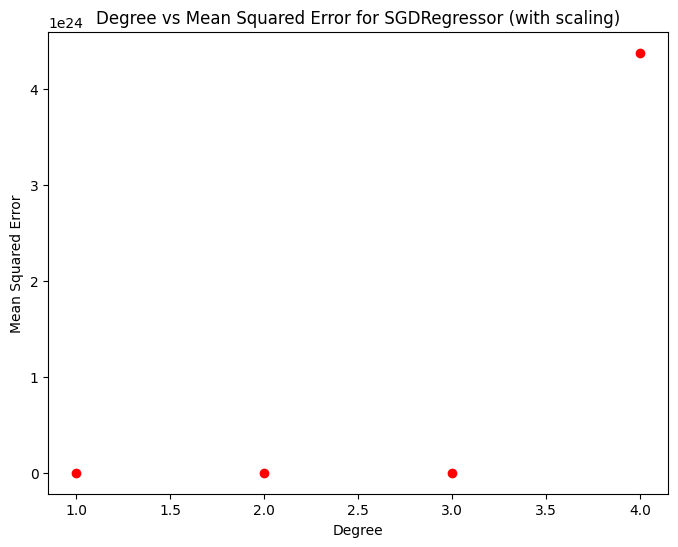

Degree: 1 	--->	  Mean Squared Error: 406.7629153384618
Degree: 2 	--->	  Mean Squared Error: 513.6241212042737
Degree: 3 	--->	  Mean Squared Error: 1.1345891035638516e+19
Degree: 4 	--->	  Mean Squared Error: 4.376938698515779e+24


In [16]:
# selecting data
X = df[['Beds', 'Baths', 'Area']]
y = df['Price']

# scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

degrees = [1, 2, 3, 4]

# set up plot
fig, ax = plt.subplots(figsize=(8,6))
fig2, ax2 = plt.subplots(figsize=(8,6))

mses = []

# training and testing model for each degree
for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = SGDRegressor(max_iter=100000, random_state=42)
    model.fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)
    r2 = r2_score(y_test, y_pred)
    
    print("Degree: {} \t--->\t  R-Squared Score: {} ".format(degree, r2))
    
    ax.plot(degree, r2, 'ro')
    ax2.plot(degree, mse, 'ro')
    
ax.set_xlabel('Degree')
ax.set_ylabel('R-Squared Score')
ax.set_title('Degree vs R-Squared Score for SGDRegressor (with scaling)')

ax2.set_xlabel('Degree')
ax2.set_ylabel('Mean Squared Error')
ax2.set_title('Degree vs Mean Squared Error for SGDRegressor (with scaling)')


# plotting graph
plt.show()

for i in range(4):
    print("Degree: {} \t--->\t  Mean Squared Error: {}".format(i+1, mses[i]))

## Normal Equation

In [17]:
import numpy as np

# selecting data
X = df[['Beds', 'Baths', 'Area']].values
y = df['Price'].values


m = X.shape[0] 

# Appending a cloumn of ones
X = np.append(X, np.ones((m,1)), axis=1)    

y = y.reshape(m,1)

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normal Equation
theta_opt = np.dot(np.linalg.inv(np.dot(X_train.T.astype(float), X_train.astype(float))), np.dot(X_train.T.astype(float), y_train.astype(float)))

# prediction
y_pred = X_test.astype(float).dot(theta_opt)

# accuracy scores
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Optimal theta: ", theta_opt)
print("R-Squared score: ", r2)
print("Mean Squared Error: ", mse)

Optimal theta:  [[ 1.40341328]
 [ 0.98587144]
 [15.89133413]
 [-2.18013562]]
R-Squared score:  0.6578367081334215
Mean Squared Error:  406.8768185953941
